<a href="https://colab.research.google.com/github/BorkenWill/TESTING/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving wengggggg.jpg to wengggggg.jpg

🔍 Running prediction on: wengggggg.jpg

image 1/1 /content/wengggggg.jpg: 640x576 1 1, 11.9ms
Speed: 2.9ms preprocess, 11.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs/segment/predict33


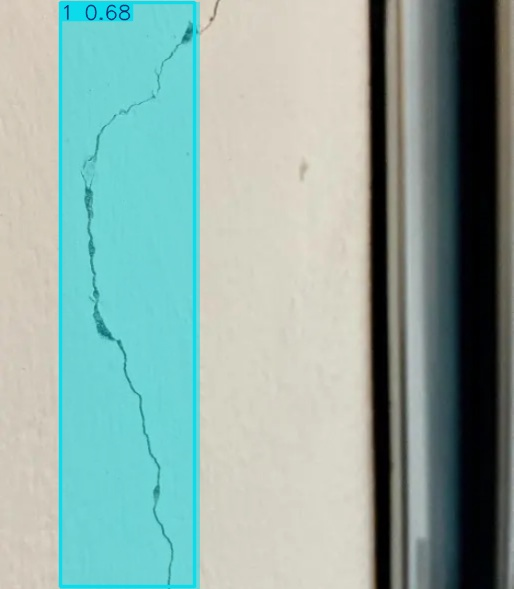

In [79]:
from google.colab import files
from ultralytics import YOLO
from IPython.display import Image, display
from PIL import Image as PILImage
import os, glob, shutil

# Step 1: Upload any image(s)
uploaded = files.upload()

# Step 2: Load your trained model
model = YOLO("runs/segment/train/weights/best.pt")

# Step 3: Sanitize, predict, and display results
for original_name in uploaded.keys():
    # Sanitize filename: replace spaces and parentheses
    safe_name = original_name.replace(" ", "_").replace("(", "").replace(")", "")
    if safe_name != original_name:
        shutil.move(original_name, safe_name)

    print(f"\n🔍 Running prediction on: {safe_name}")

    # Run inference
    results = model.predict(source=safe_name, save=True, conf=0.4)

    # Locate most recent prediction folder
    latest_folder = sorted(glob.glob("runs/segment/predict*"), key=os.path.getmtime)[-1]
    predicted_path = os.path.join(latest_folder, safe_name)

    # Handle .webp display
    if os.path.exists(predicted_path):
        if predicted_path.lower().endswith(".webp"):
            img = PILImage.open(predicted_path).convert("RGB")
            jpg_path = predicted_path.replace(".webp", ".jpg")
            img.save(jpg_path)
            display(Image(filename=jpg_path))
        else:
            display(Image(filename=predicted_path))
    else:
        print(f"⚠️ Predicted file not found at {predicted_path}")
